In [1]:
import os
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
import veeringCV

from importlib import reload


reload(veeringCV)

<module 'veeringCV' from '/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py'>

In [2]:
date = '251019'
ind = 1
sails = ['portMain', 'stbMain', 'portJib', 'stbJib']
files = ['Port Main', 'Stb Main', 'Port Jib', 'Stb Jib']

importDirectory = os.path.join('/Users/sean/mbp_storage',date,sails[ind])
importPath = os.path.join(importDirectory,files[ind]+'.h5')
print(importDirectory)
print(importPath)

/Users/sean/mbp_storage/251019/stbMain
/Users/sean/mbp_storage/251019/stbMain/Stb Main.h5


In [3]:
# normalisations = []
# features = veeringCV.VeeringNormalisation(importPath)
# features.RunNormalisation(normalisations)
# images = np.reshape(features.pixcels, features.origShape, order='F')
# testPic = images[:, :, :, 0]
# plt.imshow(testPic.astype('uint8'))

In [4]:
## Load H5 File
normalisations = [1,3]
features = veeringCV.VeeringNormalisation(importPath)
features.RunNormalisation(normalisations)

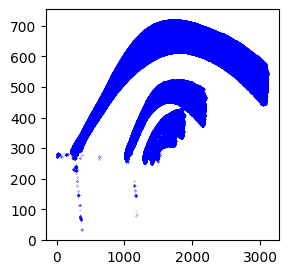

In [5]:
## Generate Pixcels
targetColour = [256,165,130]
searchRange = [175,200,5]

thresholds = veeringCV.Thresholding(features.pixcels,targetColour,searchRange)
thresholds.Run_Thresholding()
thresholds.Generate_Stripe_Pixcels(int(0),features.pixcels,features.origShape)
#thresholds.Count_Filter(float(0.1),float(0.9))
thresholds.Stripes_Plot_Clean()


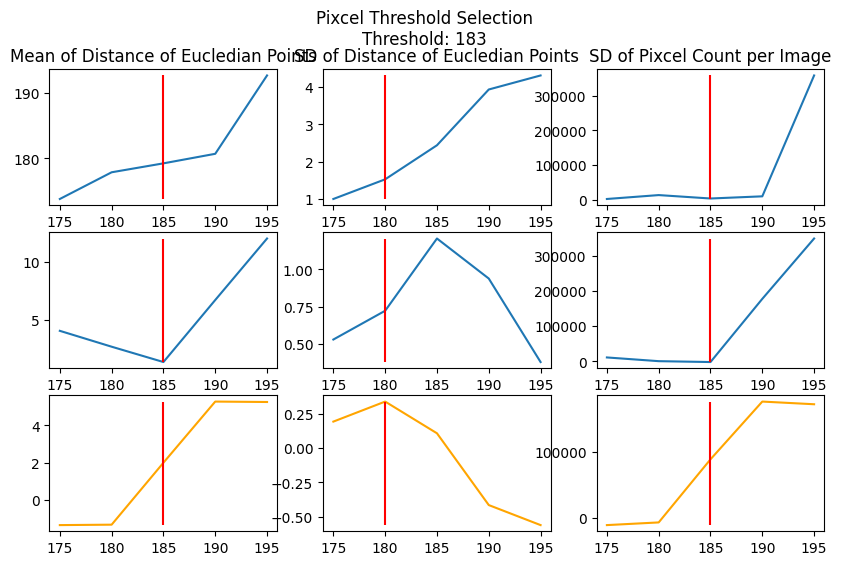

In [6]:
## Thresholds Graph
thresholds.Threshold_Graphs()

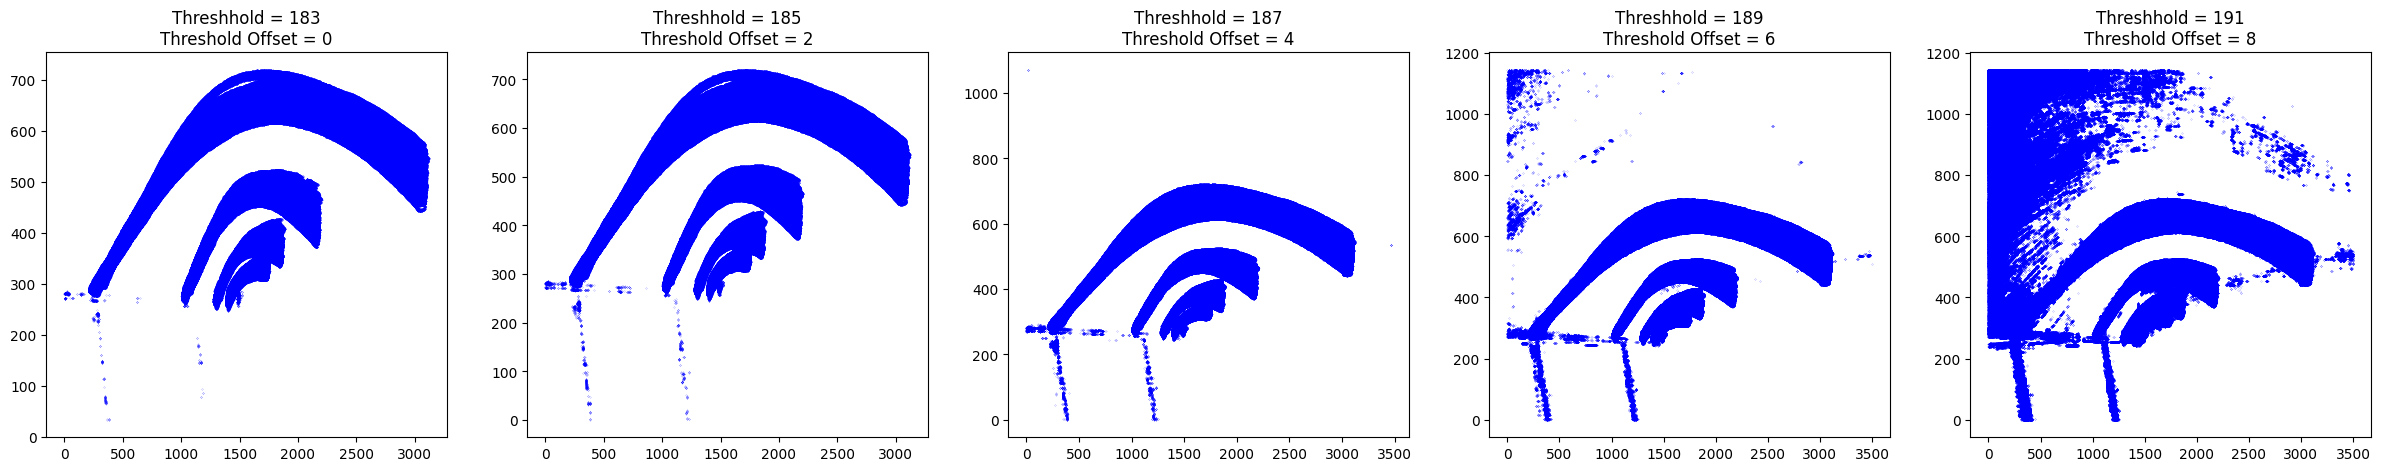

In [7]:
## Offset Sweep
thresholds.Threshold_Sweep_Graphs([0,2,4,6,8], features.origShape, features.pixcels)

In [8]:
thresholds.Generate_Stripe_Pixcels(4,features.pixcels,features.origShape)

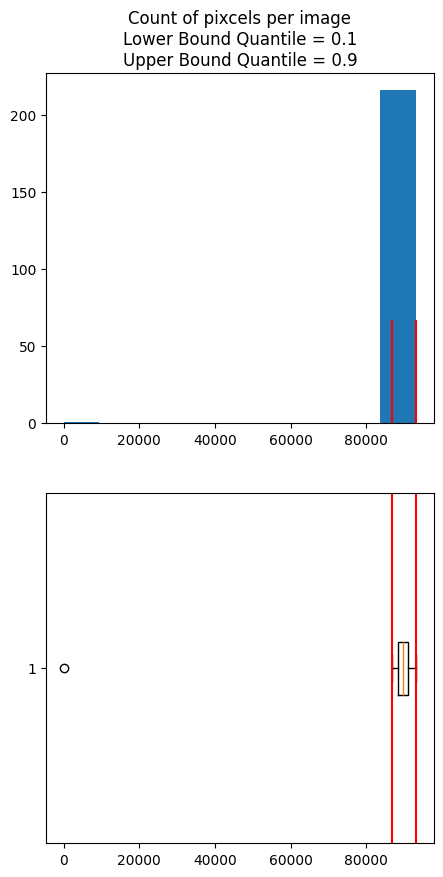

In [9]:
## Count Cleaning Graphs
thresholds.Count_Filter(float(0.1),float(0.9))
thresholds.Cnt_Filter_Plot()

In [10]:
multipliers = [0.005, 0.001]
countFilter_ind = thresholds.countFilter_ind
clusterOffset = 0
set_db = veeringCV.Set_DB(thresholds.stripes, multipliers, countFilter_ind, clusterOffset)

In [11]:
set_db.Set_PCA_DB()

2


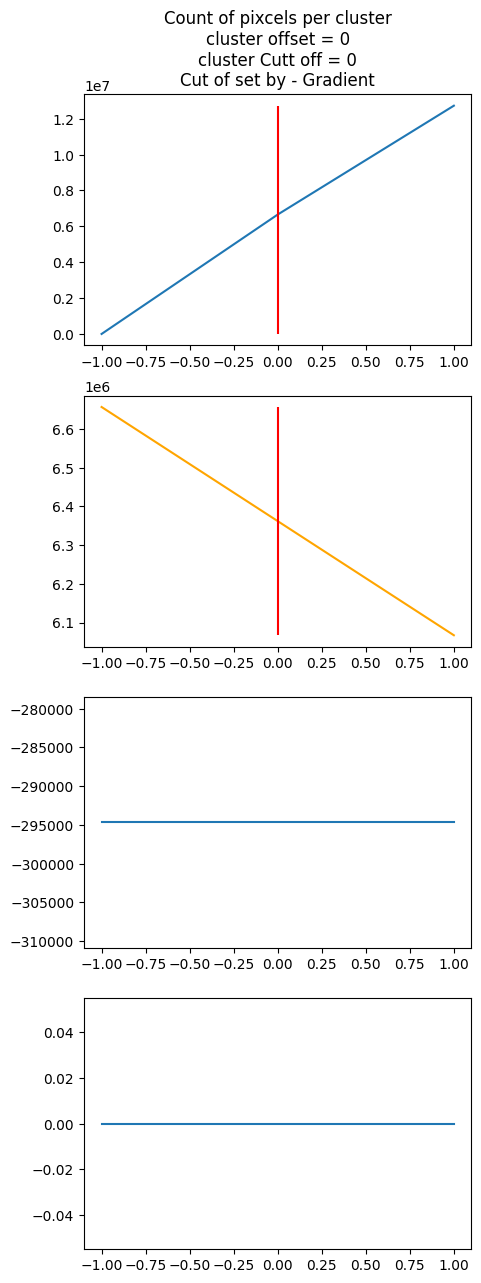

In [12]:
set_db.Cluster_Filter_FIG()

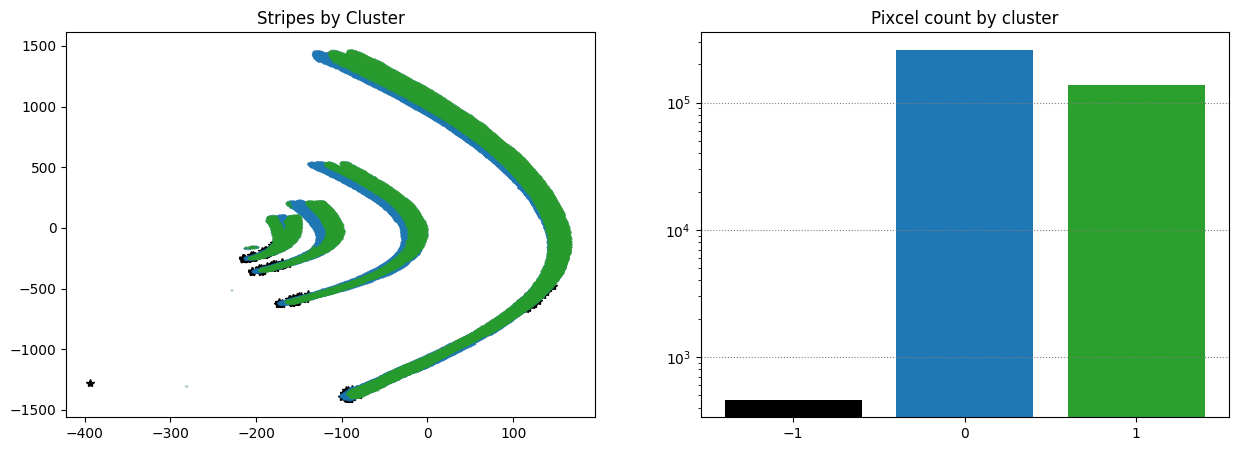

In [13]:
set_db.Cluster_Plot_FIG()

In [14]:
stripes, setPCA = set_db.Make_DB_Scan_Set()

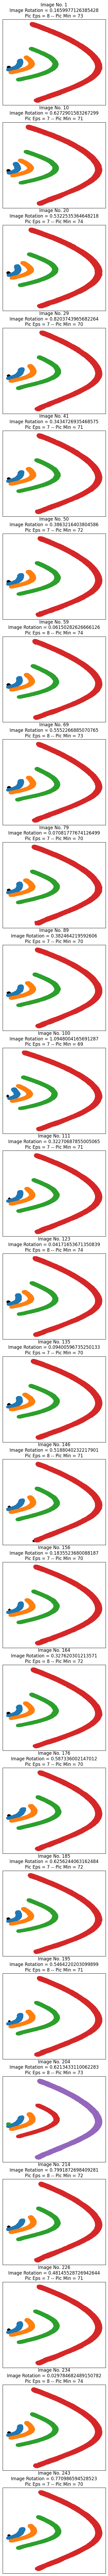

In [15]:
pic_mult = [0.02, 0.0004]
pic_db = veeringCV.Pic_DB(stripes,set_db.setRotation_degrees, setPCA)
pic_db.Pic_DB_Scan(True,25,pic_mult[0],pic_mult[1])

In [16]:
pic_db = veeringCV.Pic_DB(stripes,set_db.setRotation_degrees, setPCA)
pic_db.Pic_DB_Scan(False,25,pic_mult[0],pic_mult[1])

In [17]:
cp_dict = pic_db.clusterPoints_dict

In [18]:
numberStripes = 4

In [19]:
fit_calc = veeringCV.Fit_Spline_Calc(cp_dict, features.origShape, setPCA)
fit_calc.Fit_Splines(False, 0.1, 5, 0.1)
fit_calc.Link_Splines(False, 75, 1.25, 4)
fit_calc.Filter_Splines(numberStripes)
fit_calc.Calc_Properties()

n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 length = (0,)
n = 1 m = 2 length = (0,)
n = 1 m = 3 length = (0,)
n = 2 m = 3 length = (0,)
n = 0 m = 1 length = (0,)
n = 0 m = 2 length = (0,)
n = 0 m = 3 

/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py:926: RuntimeWarning: divide by zero encountered in divide
  frontCamber = (frontCamber - draft_vector_rot_origin[0]) / (draft_vector_rot[0] - draft_vector_rot_origin[0])
/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py:930: RuntimeWarning: invalid value encountered in divide
  backCamber = (backCamber - draft_vector_rot_origin[0]) / (draft_vector_rot[0] - draft_vector_rot_origin[0])
/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py:926: RuntimeWarning: invalid value encountered in divide
  frontCamber = (frontCamber - draft_vector_rot_origin[0]) / (draft_vector_rot[0] - draft_vector_rot_origin[0])
/Users/sean/PycharmProjects/stripeFieldGUI/veeringCV.py:930: RuntimeWarning: divide by zero encountered in divide
  backCamber = (backCamber - draft_vector_rot_origin[0]) / (draft_vector_rot[0] - draft_vector_rot_origin[0])


In [20]:
picture = veeringCV.VeeringNormalisation(importPath)
picture.RunNormalisation([])
export_class = veeringCV.Export_Results(picture, features.timestamps,importPath)
export_class.Export_Images(fit_calc.splines_set_final, fit_calc.stripe_properties, ['.pdf', '.jpg'])

Saved PDF of 1
Saved JPG of 1
Saved PDF of 2
Saved JPG of 2
Saved PDF of 3
Saved JPG of 3
Saved PDF of 4
Saved JPG of 4
Saved PDF of 5
Saved JPG of 5
Saved PDF of 7
Saved JPG of 7
Saved PDF of 8
Saved JPG of 8
Saved PDF of 9
Saved JPG of 9
Saved PDF of 10
Saved JPG of 10
Saved PDF of 11
Saved JPG of 11
Saved PDF of 12
Saved JPG of 12
Saved PDF of 14
Saved JPG of 14
Saved PDF of 15
Saved JPG of 15
Saved PDF of 16
Saved JPG of 16
Saved PDF of 17
Saved JPG of 17
Saved PDF of 18
Saved JPG of 18
Saved PDF of 20
Saved JPG of 20
Saved PDF of 21
Saved JPG of 21
Saved PDF of 22
Saved JPG of 22
Saved PDF of 23
Saved JPG of 23
Saved PDF of 25
Saved JPG of 25
Saved PDF of 26
Saved JPG of 26
Saved PDF of 27
Saved JPG of 27
Saved PDF of 28
Saved JPG of 28
Saved PDF of 29
Saved JPG of 29
Saved PDF of 31
Saved JPG of 31
Saved PDF of 32
Saved JPG of 32
Saved PDF of 33
Saved JPG of 33
Saved PDF of 36
Saved JPG of 36
Saved PDF of 37
Saved JPG of 37
Saved PDF of 38
Saved JPG of 38
Saved PDF of 40
Saved JP

<Figure size 640x480 with 0 Axes>

In [21]:
export_class.Export_Data_CSV(fit_calc.stripe_properties,numberStripes)

In [22]:
export_class.Export_HyperParams("JNB", str(targetColour), normalisations, thresholds.threshold_offset, thresholds.threshold, thresholds.threshold, thresholds.lowerBound,
                                        thresholds.upperBound, set_db.set_eps_multiplier, set_db.set_min_multiplier, set_db.clusterOffset, pic_mult[0],pic_mult[1],
                                        numberStripes, importPath)